In [57]:
from hashlib import md5
import pandas as pd
import json
import statsmodels.api as sm
import numpy as np
from sklearn import datasets
from random import randint, random

In [169]:
objs = []
for i in range(0,1000):
    obj = {}
    obj['SchoolSize'] = randint(200,1000)
    obj['SchoolVisits'] = round(randint(1,50)*obj['SchoolSize']/randint(1000,2000))
    obj['CulturalCenterVisits'] = randint(0,10)
    obj['TeacherEmails'] = randint(30,300)
    obj['Webinars'] = randint(0,20)
    obj['YESApplicants'] = obj['SchoolSize']*random() + 2*obj['SchoolVisits'] + randint(1,2)*obj['CulturalCenterVisits'] + 0.7*obj['TeacherEmails'] - 0.05*obj['Webinars']
    objs.append(obj)
    

In [170]:
df = pd.DataFrame(objs)
y = df[['YESApplicants']]
x = df[['SchoolSize','SchoolVisits','CulturalCenterVisits','TeacherEmails','Webinars']]

In [171]:
df.describe()

,CulturalCenterVisits,SchoolSize,SchoolVisits,TeacherEmails,Webinars,YESApplicants
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.057000,610.798000,10.594000,162.787000,10.293000,447.479417
std,3.238555,231.034578,8.014824,75.787884,6.008932,226.544255
min,0.000000,200.000000,0.000000,30.000000,0.000000,48.051336
25%,2.000000,413.000000,4.000000,101.000000,5.000000,267.926174
50%,5.000000,608.000000,9.000000,163.500000,10.000000,402.877442
75%,8.000000,808.250000,15.000000,223.250000,16.000000,597.112598
max,10.000000,1000.000000,40.000000,300.000000,20.000000,1188.700282


In [172]:
mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          YESApplicants   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1231.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:15:49   Log-Likelihood:                -6650.4
No. Observations:                1000   AIC:                         1.331e+04
Df Residuals:                     995   BIC:                         1.334e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
SchoolSize               0.4927 

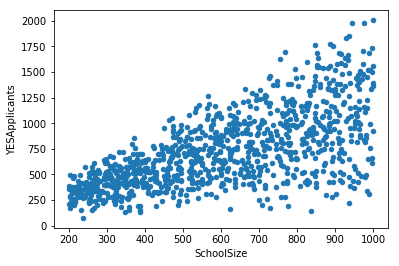

In [155]:
df.plot.scatter('SchoolSize','YESApplicants')

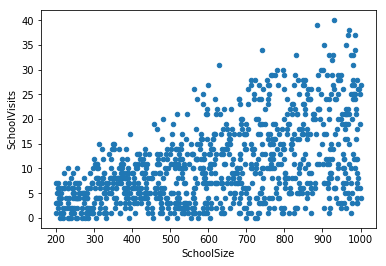

In [173]:
df.plot.scatter('SchoolSize','SchoolVisits')

In [174]:
df.to_csv('YES_Applicants.csv',index=False)